<h1 style="font-size:2.75rem;color:rgb(0,101,189);"> Design Script for a single-stage recycling folded-cascode (RFC) operational transconductance amplifier (OTA) with
single-ended output</h1>

# <u> Imports

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# <u> Units

In [2]:
q  = 1.60e-19   # Electron charge
KB = 1.38e-23   # Boltzmann constant

engFormat_Gain  = EngFormatter(unit='dB',     places=3, sep=' ')
engFormat_GBW   = EngFormatter(unit='Hz',     places=3, sep=' ')
engFormat_OS    = EngFormatter(unit='V',      places=3, sep=' ')
engFormat_PD    = EngFormatter(unit='W',      places=3, sep=' ')
engFormat_FoM   = EngFormatter(unit='',       places=3, sep=' ')
engFormat_Width = EngFormatter(unit='m',      places=2, sep=' ')
engFormat_Pole  = EngFormatter(unit='Hz',     places=2, sep=' ')

HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'

# <u> Design data

In [3]:
IB  = 50e-06   # Bias current 
CL  = 2.0e-12   # Load capacitance
VDD = 1.2       # Supply voltage
BE  = 0.7       # 0.6 < BE < 0.7


# Transistor lengths
L_1N     = 0.6e-06;  L_3N     = 0.6e-06;  L_5P     = 0.6e-06;
# Bulk-source voltage drop
VBS_3P   = 0.2;  VBS_5N   = 0.2; VBS_13N = 0.2; 
# Bulk-drain voltage drop
VDB_11P = 0.2; VDB_3P = 0.2; VDB_1bP = 0.2; VDB_7bN = 0.2; VDB_13N = 0.2; VDB_2aP = 0.2; VDB_7aN = 0.2; VDB_5N = 0.2;
# Saturation voltage voltage
VDSAT_1N = 100e-03;  VDSAT_3N = 100e-03;  VDSAT_5P = 100e-03;



#Circuit
#IB = IB
VDSAT_MAX  = 150e-3
VDSAT_MIN  = 50e-3
VDSAT_STEP = 200e-03/100
LSIZE_MAX  = 1e-6
LSIZE_MIN  = 600e-9
LSIZE_STEP = 10e-09



# Array definition
VSAT_arr = np.arange( VDSAT_MIN, VDSAT_MAX, VDSAT_STEP )
L_arr    = np.arange( LSIZE_MIN, LSIZE_MAX, LSIZE_STEP)


"""
TODO
LFree = {  }
WFree = {  }

def genList():
"""
mosNames  = [ "P2a","P2b","P3","P11" ,"N5","N7a","N7b","N13", "N8a","N8b", "P1a","P1b", "P10","P9","N12","P4","N6","Nb7","Nb3","Pb6","Nb5","Pb1","Pb2","Pb4","N12","N13"]

vdsatListGl = { "P2a": 50e-3,"P2b": 100e-3, "P3": 100e-3,"N5": 100e-3,"N7b":100e-3 ,"N7a":100e-3,"N13":100e-3, "P9":100e-3, "P1b":50e-3, "P1a":100e-3, "N12":100e-3,"N8a":100e-3,"N8b":100e-3,"P10":100e-3,"P4":100e-3,"N6":100e-3,"P11":100e-3,}
LsizesGl    = { "P2a": 800e-9,"P2b": 600e-9, "P3": 600e-9,"N5": 600e-9,"N7b":600e-9 ,"N7a":600e-9,"N13":600e-9, "P9":600e-9, "P1b":600e-9, "P1a":600e-9, "N12":600e-9,"N8a":600e-9,"N8b":600e-9,"P10":600e-9,"P4":600e-9,"N6":600e-9,"P11":600e-9,}     #FIXME Tamanho real ou multiplicador 
WsizesGl    = { "P2a": 180e-9,"P2b": 180e-9, "P3": 180e-9,"N5": 180e-9,"N7b":180e-9 ,"N7a":180e-9,"N13":180e-9, "P9":180e-9, "P1b":180e-9, "P1a":180e-9, "N12":180e-9,"N8a":180e-9,"N8b":180e-9,"P10":180e-9,"P4":180e-9,"N6":180e-9,"P11":180e-9,}     #FIXME Tamanho real ou multiplicador 


# <u> Technology Definitions

In [4]:
# Parameters for TSMC65NM (K = u0*Cox = u0*E0*epsrox/toxm)
V_TN = 0.28615208;   K_N = 244.961e-06; # 0.0184444380*8.854e-12*3.9/2.60e-09
V_TP = 0.43718619;   K_P = 130.808e-06; # 0.0106069150*8.854e-12*3.9/2.80e-09

# Non LDD region source-gate overlap capacitance per unit channel width - CGSO/CGDO (TSMC65NM)
CGSD0_N = 89.18e-12
CGSD0_P = 74.90e-12

# Cox = E0*Er/tox (TSMC65NM)
COX_N = 13.28e-03   # 8.854e-12*3.9/2.60e-09
COX_P = 12.33e-03   # 8.854e-12*3.9/2.80e-09

# Drain/source minimum drawing area
Sd_s = 0.2*1e-06

# Bottom junction capacitance per unit area at zero bias - CJS/CJD (TSMC65NM)
CJ_N   = 1.185e-03;   CJ_P   = 1.068e-03;

# Bottom junction built-in potential - PBS/PBD (TSMC65NM)
PB_N   = 0.700;       PB_P   = 0.700;

# Bottom junction capacitance grating coefficient - MJS/MJD (TSMC65NM)
MJ_N   = 0.310;       MJ_P   = 0.310;

# Isolation-edge sidewall junction capacitance per unit area - CJSWS/CJSWD (TSMC65NM)
CJSW_N = 94.00e-12;   CJSW_P =  76.00e-12;

# Isolation-edge sidewall junction capacitance grading coefficient MJSWS/MJSWD (TSMC65NM)
MJSW_N = 0.080;       MJSW_P = 0.060;

In [5]:
# u0 is dependent on the transistor dimensions
def u0_arr_N(W, L):
    if   (W >=  10e-06 and W <= 900e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0203900000
        elif (L >=   1e-06 and L <   10e-06): return 0.0206752440
        elif (L >= 240e-09 and L <    1e-06): return 0.0184444380
        elif (L >= 100e-09 and L <  240e-09): return 0.0159778710
        elif (L >=  60e-09 and L <  100e-09): return 0.0105131640
        else: return -1
    elif (W >=   1e-06 and W <   10e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0205407330
        elif (L >=   1e-06 and L <   10e-06): return 0.0208280430
        elif (L >= 240e-09 and L <    1e-06): return 0.0185811630
        elif (L >= 100e-09 and L <  240e-09): return 0.0160011950
        elif (L >=  60e-09 and L <  100e-09): return 0.0106698390
        else: return -1
    elif (W >= 600e-09 and W <    1e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0217105000
        elif (L >=   1e-06 and L <   10e-06): return 0.0220157430
        elif (L >= 240e-09 and L <    1e-06): return 0.0196231290
        elif (L >= 100e-09 and L <  240e-09): return 0.0179624840
        elif (L >=  60e-09 and L <  100e-09): return 0.0082323123
        else: return -1
    elif (W >= 300e-09 and W <  600e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0174033330
        elif (L >=   1e-06 and L <   10e-06): return 0.0176456830
        elif (L >= 240e-09 and L <    1e-06): return 0.0157559150
        elif (L >= 100e-09 and L <  240e-09): return 0.0144015760
        elif (L >=  60e-09 and L <  100e-09): return 0.0066402542
        else: return -1
    elif (W >= 120e-09 and W <  300e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0175100000
        elif (L >=   1e-06 and L <   10e-06): return 0.0177556860
        elif (L >= 240e-09 and L <    1e-06): return 0.0158322950
        elif (L >= 100e-09 and L <  240e-09): return 0.0147731200
        elif (L >=  60e-09 and L <  100e-09): return 0.0128307880
        else: return -1
    else:
        return -1
    
def u0_arr_P(W, L):
    if   (W >=  10e-06 and W <= 900e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0117200000
        elif (L >=   1e-06 and L <   10e-06): return 0.0118838970
        elif (L >= 240e-09 and L <    1e-06): return 0.0106069150
        elif (L >= 100e-09 and L <  240e-09): return 0.0097253089
        elif (L >=  60e-09 and L <  100e-09): return 0.0054866509
        else: return -1
    elif (W >=   1e-06 and W <   10e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0116905330
        elif (L >=   1e-06 and L <   10e-06): return 0.0118730050
        elif (L >= 240e-09 and L <    1e-06): return 0.0103958770
        elif (L >= 100e-09 and L <  240e-09): return 0.0095315421
        elif (L >=  60e-09 and L <  100e-09): return 0.0053767740
        else: return -1
    elif (W >= 600e-09 and W <    1e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0115615000
        elif (L >=   1e-06 and L <   10e-06): return 0.0113074600
        elif (L >= 240e-09 and L <    1e-06): return 0.0145007250
        elif (L >= 100e-09 and L <  240e-09): return 0.0132993490
        elif (L >=  60e-09 and L <  100e-09): return 0.0076226273
        else: return -1
    elif (W >= 300e-09 and W <  600e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0135300000
        elif (L >=   1e-06 and L <   10e-06): return 0.0137039520
        elif (L >= 240e-09 and L <    1e-06): return 0.0123928480
        elif (L >= 100e-09 and L <  240e-09): return 0.0113642910
        elif (L >=  60e-09 and L <  100e-09): return 0.0055557057
        else: return -1
    elif (W >= 120e-09 and W <  300e-06):
        if   (L >=  10e-06 and L <=  20e-06): return 0.0104900000
        elif (L >=   1e-06 and L <   10e-06): return 0.0106371380
        elif (L >= 240e-09 and L <    1e-06): return 0.0094906926
        elif (L >= 100e-09 and L <  240e-09): return 0.0086965429
        elif (L >=  60e-09 and L <  100e-09): return 0.0048266510
        else: return -1
    else:
        return -1
    
def u0_arr_N_cond(W, L):
    return np.vectorize(u0_arr_N)(W, L)
    
def u0_arr_P_cond(W, L):
    return np.vectorize(u0_arr_P)(W, L)

# <u> Transistor equations

In [6]:
def gm(ID, VDSAT):
    return np.piecewise (VDSAT, [VDSAT < 2*KB*300/q, VDSAT >= 2*KB*300/q], \
                  [lambda VDSAT: ID/(KB*300/q), lambda VDSAT: 2*ID/VDSAT])

# NEW EQUATION - CALCULATES W A SECOND TIME TO MAKE SURE IT USES THE CORRECT u0 VALUE
def W_N(ID, VDSAT, L):
    W_est = L * 2 * ID / (K_N * VDSAT**2)
    for i in range(0, 1):
        W_est = L * 2 * ID / (u0_arr_N_cond(W_est, L) * COX_N * VDSAT**2)
    return W_est

def W_P(ID, VDSAT, L):
    W_est = L * 2 * ID / (K_P * VDSAT**2)
    for i in range(0, 1):
        W_est = L * 2 * ID / (u0_arr_P_cond(W_est, L) * COX_N * VDSAT**2)
    return W_est

def gds_N(ID, L):
    return ID / (5000 * L * 1e-03/1e-06)

def gds_P(ID, L):
    return ID / (7500 * L * 1e-03/1e-06)

def CGD_N(ID, VDSAT, L):
    return W_N(ID, VDSAT, L) * CGSD0_N

def CGD_P(ID, VDSAT, L):
    return W_P(ID, VDSAT, L) * CGSD0_P

def CGS_N(ID, VDSAT, L):
    return (2/3) * W_N(ID, VDSAT, L) * L * COX_N

def CGS_P(ID, VDSAT, L):
    return (2/3) * W_P(ID, VDSAT, L) * L * COX_P

def CDB_N(ID, VDSAT, L, VDB):
    return ((W_N(ID, VDSAT, L) + Sd_s) * 2 * CJSW_N) / ((1 + VDB / PB_N)**MJSW_N) + \
        (W_N(ID, VDSAT, L) * Sd_s * CJ_N) / ((1 + VDB / PB_N)**MJ_N)

def CDB_P(ID, VDSAT, L, VDB):
    return ((W_P(ID, VDSAT, L) + Sd_s) * 2 * CJSW_P) / ((1 + VDB / PB_P)**MJSW_P) + \
        (W_P(ID, VDSAT, L) * Sd_s * CJ_P) / ((1 + VDB / PB_P)**MJ_P)

def CSB_N(ID, VDSAT, L, VBS):
    return ((W_N(ID, VDSAT, L) * (Sd_s + L) * CJ_N) / ((1 - VBS / PB_N)**MJ_N)) + \
        ((W_N(ID, VDSAT, L) + Sd_s) * 2 * CJSW_N) / ((1 - VBS / PB_N)**MJSW_N) + \
        (2 * W_N(ID, VDSAT, L) * L * CJ_N) / (3 * ((1 - VBS / PB_N)**MJ_N))

def CSB_P(ID, VDSAT, L, VBS):
    return ((W_P(ID, VDSAT, L) * (Sd_s + L) * CJ_P) / ((1 - VBS / PB_P)**MJ_P)) + \
        ((W_P(ID, VDSAT, L) + Sd_s) * 2 * CJSW_P) / ((1 - VBS / PB_P)**MJSW_P) + \
        (2 * W_P(ID, VDSAT, L) * L * CJ_P) / (3 * ((1 - VBS / PB_P)**MJ_P))

# <u> Circuit equations

\begin{gather*}
G_M = g_{m2a} + gm_{1b}\cdot\frac{g_{m7a}}{g_{m7b}} \approx g_{m2a} + 3\cdot g_{m1b}\\
g_{out} = g_{op} + g_{on}\\
g_{op} = g_{ds11}\cdot\frac{g_{ds3}}{g_m3} \\
g_{on} =  \left(  g_{ds2a} + g_{ds7a} \right )\cdot \frac{g_{ds5}}{g_{m5}}\\
C_{out} = C_L + C_{bd3} + C_{gd3} + C_{bd5} + C_{gd5} \\
C_x = C_{gd7a} + C_{bd7a}+ C_{gd2a} + C_{bd2a} + C_{gd5} + C_{bs5}\\
C_z = C_{gs13} + C_{bs13} + C_{bd7b}+ C_{gs7b} \\
r_z \approx \frac{1}{gm13} ; r_x \approx g_{m5} \\
f_{p2} = \frac{1}{C_x\cdot r_x};  f_{p3} = \frac{1}{C_z\cdot r_z}\\
A_v =  \frac{G_M}{g_{out}}\\[0.125cm]
GBW = \frac{G_M}{C_{out}} \\[0.125cm]
OS = V_{DD} - V_{DSsat11} - V_{DSsat3} - V_{DSsat5} - V_{DSsat7a}- 0.08 \\[0.125cm]
\textit{Power} = V_{DD} \times \left(2 \times \dfrac{I_B}{2} + \dfrac{I_B\cdot 4}{10}\right) \\[0.125cm]
FoM = 1000 \times \dfrac{GBW \times C_L}{\textit{Power}}\\
\Gamma = 1 + \frac{3}{4}\cdot \frac{gm_{8a}}{gm_{1a}} + \frac{1}{4}\cdot \frac{gm_{10}}{gm_{1a}}
\end{gather*}


In [7]:
def gout(ib, vdsatList, Lsizes): 
    return ( gds_P(ib/2, Lsizes["P11"] )*( gds_P( ib/2,Lsizes["P3"] )/(BE*gm(ib/2, vdsatList["P3"])) ) ) + ( gds_P( ib/4,Lsizes["P2a"] ) + gds_N( 3*ib/4,Lsizes["N7a"] ) ) * ( gds_N( ib/2,Lsizes["N5"] )/(BE*gm( ib/2,vdsatList["N5"] )) )

def c1(ib, vdsatList, Lsizes):
    return CGD_P(ib/2, vdsatList["P11"], Lsizes["P11"]) + CDB_P(ib/2, vdsatList["P11"], Lsizes["P11"], VDB_11P) + CSB_P(ib/2, vdsatList["P3"], Lsizes["P3"], VBS_3P) + CGS_P(ib/2, vdsatList["P3"], Lsizes["P3"])

def c2_out(ib, vdsatList, Lsizes): 
    return CL + CDB_P( ib/2,vdsatList["P3"],Lsizes["P3"], VDB_3P) + CGD_P( ib/2,vdsatList["P3"],Lsizes["P3"] ) + CDB_N( ib/2,vdsatList["N5"],Lsizes["N5"], VDB_5N) + CGD_N( ib/2,vdsatList["N5"],Lsizes["N5"] )

def c3(ib,vdsatList,Lsizes): 
    return CSB_N(ib/2,vdsatList["N5"],Lsizes["N5"], VBS_5N) + CGS_N(ib/2,vdsatList["N5"],Lsizes["N5"]) + CGD_N(3*ib/4,vdsatList["N7a"],Lsizes["N7a"]) + CDB_N(3*ib/4,vdsatList["N7a"],Lsizes["N7a"], VDB_7aN) + CGD_P(ib,vdsatListGl["P2a"],Lsizes["P2a"]) + CDB_P(ib,vdsatList["P2a"],Lsizes["P2a"], VDB_2aP)

def c4(ib,vdsatList,Lsizes):
    return CDB_P(ib,vdsatList["P1b"],Lsizes["P1b"], VDB_1bP) + CGD_P(ib,vdsatListGl["P1b"],Lsizes["P1b"]) + CGD_N(ib/4,vdsatList["N13"],Lsizes["N13"]) + CDB_N(ib/4,vdsatList["N13"],Lsizes["N13"], VDB_13N) + CGD_N(ib/4,vdsatList["N7b"],Lsizes["N7b"]) + CGS_N(ib/4,vdsatList["N7b"],Lsizes["N7b"])+ CGS_N(3*ib/4,vdsatList["N7a"],Lsizes["N7a"]) + CGD_N(3*ib/4,vdsatList["N7a"],Lsizes["N7a"])

def c5(ib,vdsatList,Lsizes): 
    return CDB_N(ib/4,vdsatList["N7b"],Lsizes["N7b"], VDB_7bN) + CGD_N(ib/4,vdsatList["N7b"],Lsizes["N7b"]) + CGS_N(ib/4,vdsatList["N13"],Lsizes["N13"]) + CSB_N(ib/4,vdsatList["N13"],Lsizes["N13"], VBS_13N)

def r1(ib, vdsatList): 
    return 1/(BE*gm(ib/2, vdsatList["P3"]))

def r2_out(ib, vdsatList, Lsizes):
    return 1/gout(ib, vdsatList, Lsizes)

def r3(ib, vdsatList):
    return 1/(gm(ib/2,vdsatList["N5"])*BE)

def r4(ib, vdsatList):
    return 1/gm(ib/4,vdsatList["N7b"])

def r5(ib,vdsatList):
    return 1/(gm(ib/4,vdsatList["N13"])*BE)

def fp1(ib, vdsatList, Lsizes):
    return 1/(2*np.pi*c1(ib,vdsatList, Lsizes)*r1(ib, vdsatList))

def fp2_out(ib, vdsatList, Lsizes):
    return 1/(2*np.pi*c2_out(ib,vdsatList, Lsizes)*r2_out(ib, vdsatList, Lsizes))

def fp3(ib, vdsatList, Lsizes):
    return 1/(2*np.pi*c3(ib,vdsatList, Lsizes)*r3(ib, vdsatList))

def fp4(ib, vdsatList, Lsizes):
    return 1/(2*np.pi*c4(ib,vdsatList, Lsizes)*r4(ib, vdsatList))

def fp5(ib, vdsatList, Lsizes):
    return 1/(2*np.pi*c5(ib,vdsatList, Lsizes)*r5(ib, vdsatList))

def GMTotal(vdsatList, ib): 
    return ( gm( ib/4,vdsatList["P2a"] ) + 3*gm( ib/4,vdsatList["P1b"] ))*BE

def gain(vdsatList, ib,  Lsizes): 
    return GMTotal(vdsatList, ib)/gout(ib, vdsatList, Lsizes)

def GBW(vdsatList ,ib ,Lsizes): 
    return ( GMTotal(vdsatList, ib))/(2*np.pi*c2_out(ib, vdsatList, Lsizes))

def OS(vdsatList): 
    return VDD - vdsatList["P11"] - vdsatList["N7a"] - vdsatList["N5"] -vdsatList["P3"] - 0.08

def PD(ib): 
    return VDD * (((2 * ib) / 2) + ((4*ib)/ 10))

def FoM(vdsatList ,ib ,Lsizes ): 
    return 1000 * (GBW(vdsatList ,ib ,Lsizes ) * CL) / PD(ib)

def area(Wsizes,Lsizes):
    return sum( [ Wsizes[k] * Lsizes[k] for k in mosNames ] )

def ENF(vdsatList, ib):
    return (1 + 0.75*(gm(0.75*ib, vdsatList['N8a'])/gm(0.25*ib, vdsatList['P1a'])) + 0.25*(gm(0.5*ib, vdsatList['P10'])/gm(0.25*ib, vdsatList['P1a'])))

# <u> Circuit parameter plots

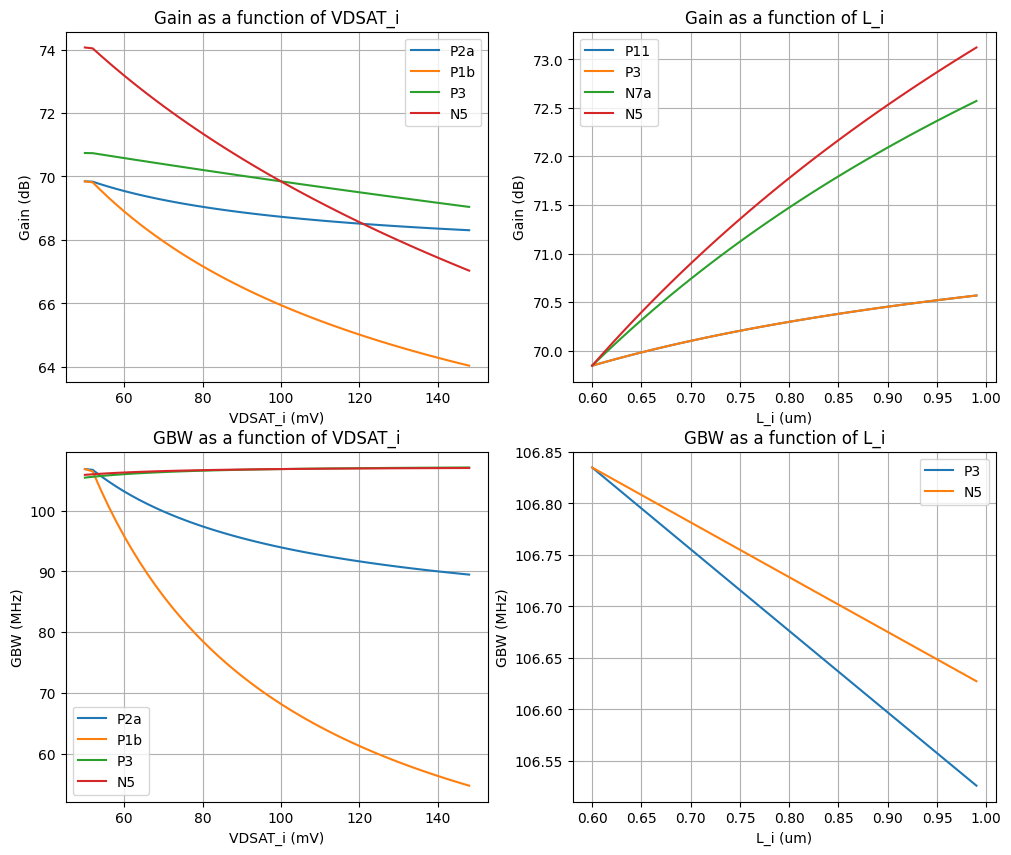

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
#fig.tight_layout()



################################################## GAIN PLOTS ##################################################
'''

'''

GainVMos  = ["P2a","P1b","P3","N5"]
GainDict = { m:[] for m in GainVMos }
for m in GainVMos:
    auxDict  = dict(vdsatListGl)
    for v in VSAT_arr:
        auxDict[m]  = v
        GainDict[m].append(20*np.log10( gain(auxDict,IB,LsizesGl) ))

GainLMos  = ["P11","P3","N7a","N5"]
GainLDict = { m:[] for m in GainLMos }
for m in GainLMos:
    auxDict = dict( LsizesGl )
    for L in L_arr:
        auxDict[m]   = L
        GainLDict[m].append(20*np.log10( gain( vdsatListGl,IB,auxDict) )) 


plt.subplot(2, 2, 1);   plt.grid()
for m in GainVMos:
    plt.plot(1e+03 * VSAT_arr, GainDict[m])

plt.xlabel('VDSAT_i (mV)')
plt.ylabel('Gain (dB)')
plt.title('Gain as a function of VDSAT_i')
plt.legend(GainVMos)

plt.subplot (2, 2, 2); plt.grid ()
for m in GainLMos:
    plt.plot( 1e+06*L_arr,GainLDict[m] )
plt.xlabel('L_i (um)')
plt.ylabel('Gain (dB)')
plt.title('Gain as a function of L_i')
plt.legend(GainLMos)
################################################## GBW PLOTS ##################################################

MosVGbw  = [ "P2a","P1b","P3","N5" ]
GbwVDict = { m:[] for m in MosVGbw }

for m in MosVGbw:
    auxDict = dict( vdsatListGl )
    for v in VSAT_arr:
        auxDict[m] = v
        GbwVDict[m].append( GBW( auxDict,IB,LsizesGl )*1e-6 )

MosLGbw  = [ "P3","N5" ]
GbwLDict = { m:[] for m in MosLGbw }

for m in MosLGbw:
    auxDict = dict( LsizesGl )
    for L in L_arr:
        auxDict[m] = L
        GbwLDict[m].append( GBW( vdsatListGl,IB,auxDict )*1e-6 )

plt.subplot(2, 2, 3);   plt.grid()
for m in MosVGbw:
    plt.plot( 1e+03 * VSAT_arr,GbwVDict[m] )
plt.xlabel('VDSAT_i (mV)')
plt.ylabel('GBW (MHz)')
plt.title('GBW as a function of VDSAT_i')
plt.legend(MosVGbw)

plt.subplot(2, 2, 4);   plt.grid()
for m in MosLGbw:
    plt.plot( 1e+06 * L_arr,GbwLDict[m] )
plt.xlabel('L_i (um)')
plt.ylabel('GBW (MHz)')
plt.title('GBW as a function of L_i')
plt.legend( MosLGbw , loc="upper right")


plt.show()

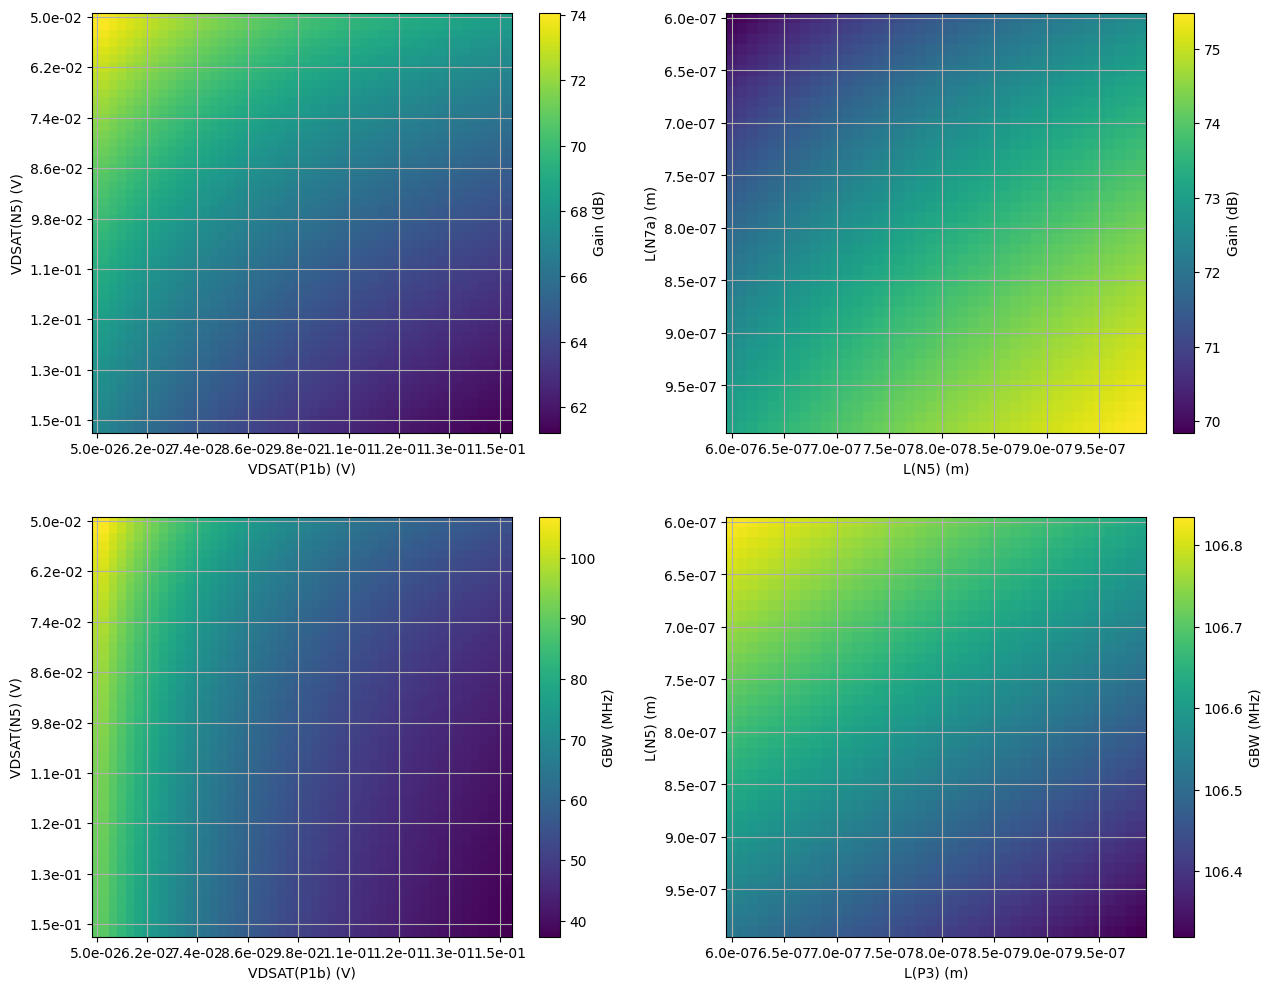

In [9]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

auxDict = dict(vdsatListGl)
gainMatrix = [[ 0 for _ in VSAT_arr ] for _ in VSAT_arr ] 
for i2a in range(len(VSAT_arr)): 
    for j1b in range(len(VSAT_arr)): 
        auxDict["N5"] = VSAT_arr[i2a] # coluna
        auxDict["P1b"] = VSAT_arr[j1b] #linha
        gainMatrix[i2a][j1b] = 20*np.log10(gain( auxDict,IB,LsizesGl )) # calculate the gain and store it in the matrix

plt.subplot(2, 2, 1);   
plt.grid()
tick_indices = np.arange(0, len(VSAT_arr), 6)
tick_labels = [f"{VSAT_arr[i]:.1e}" for i in tick_indices] # convert to scientific notation
plt.xticks(ticks=tick_indices, labels=tick_labels)
plt.yticks(ticks=tick_indices, labels=tick_labels)
#axis names
plt.xlabel('VDSAT(P1b) (V)')
plt.ylabel('VDSAT(N5) (V)')

plt.imshow(gainMatrix) 
# Add colorbar 
cbar = plt.colorbar() 
cbar.set_label('Gain (dB)')

auxDict = dict(LsizesGl)
gainMatrix = [[ 0 for _ in L_arr ] for _ in L_arr ]
for i2a in range(len(L_arr)):
    for j1b in range(len(L_arr)):
        auxDict["N5"] = L_arr[i2a]
        auxDict["N7a"] = L_arr[j1b]
        gainMatrix[i2a][j1b] = 20*np.log10(gain( vdsatListGl,IB,auxDict ))

plt.subplot (2, 2, 2); 
plt.grid ()
tick_indices = np.arange(0, len(L_arr), 5)
tick_labels = [f"{L_arr[i]:.1e}" for i in tick_indices] # convert to scientific notation
plt.xticks(ticks=tick_indices, labels=tick_labels)
plt.yticks(ticks=tick_indices, labels=tick_labels)
plt.xlabel('L(N5) (m)')
plt.ylabel('L(N7a) (m)')
plt.imshow(gainMatrix) 
# Add colorbar 
cbar = plt.colorbar() 
cbar.set_label('Gain (dB)')

################################################## GBW PLOTS ##################################################

auxDict = dict(vdsatListGl)
gbwMatrix = [[ 0 for _ in VSAT_arr ] for _ in VSAT_arr ]
for i2a in range(len(VSAT_arr)):
    for j1b in range(len(VSAT_arr)):
        auxDict["P2a"] = VSAT_arr[i2a]
        auxDict["P1b"] = VSAT_arr[j1b]
        gbwMatrix[i2a][j1b] = GBW( auxDict,IB,LsizesGl )*1e-6 

plt.subplot(2, 2, 3);   
plt.grid()
tick_indices = np.arange(0, len(VSAT_arr), 6)
tick_labels = [f"{VSAT_arr[i]:.1e}" for i in tick_indices] # convert to scientific notation
plt.xticks(ticks=tick_indices, labels=tick_labels)
plt.yticks(ticks=tick_indices, labels=tick_labels)
plt.xlabel('VDSAT(P1b) (V)')
plt.ylabel('VDSAT(N5) (V)')
plt.imshow(gbwMatrix) 
# Add colorbar 
cbar = plt.colorbar() 
cbar.set_label('GBW (MHz)')

auxDict = dict(LsizesGl)
gbwMatrix = [[ 0 for _ in L_arr ] for _ in L_arr ]
for i2a in range(len(L_arr)):
    for j1b in range(len(L_arr)):
        auxDict["P3"] = L_arr[i2a]
        auxDict["N5"] = L_arr[j1b]
        gbwMatrix[i2a][j1b] = GBW( vdsatListGl,IB,auxDict )*1e-6

plt.subplot(2, 2, 4);   
plt.grid()
tick_indices = np.arange(0, len(L_arr), 5)
tick_labels = [f"{L_arr[i]:.1e}" for i in tick_indices] # convert to scientific notation
plt.xticks(ticks=tick_indices, labels=tick_labels)
plt.yticks(ticks=tick_indices, labels=tick_labels)
plt.xlabel('L(P3) (m)')
plt.ylabel('L(N5) (m)')
plt.imshow(gbwMatrix) 
# Add colorbar 
cbar = plt.colorbar() 
cbar.set_label('GBW (MHz)')

plt.show()

# <u> Circuit optimization

In [10]:
IB  = 55e-06   # Bias current 
CL  = 2.0e-12   # Load capacitance
VDD = 1.2       # Supply voltage
BE  = 0.7       # 0.6 < BE < 0.7

vdsatListGl = { m:0 for m in mosNames }
LsizesGl    = { m:0 for m in mosNames }
WsizesGl    = { m:0 for m in mosNames }

vdsatListGl["P1b"] = 60e-3
vdsatListGl["P2a"] = 60e-3
vdsatListGl["P3"]  = 120e-3
vdsatListGl["P11"] = 100e-3
vdsatListGl["N5"]  = 70e-3
vdsatListGl["N7a"] = 100e-3
vdsatListGl["P9"]  = 100e-3
vdsatListGl["Nb3"] = 100e-3


LsizesGl["P1b"] = 180e-9
LsizesGl["P2a"] = 180e-9
LsizesGl["P3"]  = 200e-9 
LsizesGl["P11"] = 850e-9 
LsizesGl["N5"]  = 850e-9 
LsizesGl["N7a"] = 900e-9 
LsizesGl["P9"]  = 600e-9 
LsizesGl["Nb3"] = 180e-9


vdsatListGl["P1a"] = vdsatListGl["P1b"]
vdsatListGl["P2b"] = vdsatListGl["P2a"]
vdsatListGl["P4"]  = vdsatListGl["P3"]
vdsatListGl["P10"] = vdsatListGl["P11"]
vdsatListGl["Pb6"] = vdsatListGl["P11"]
vdsatListGl["Nb7"] = vdsatListGl["Nb3"]
vdsatListGl["N6"]  = vdsatListGl["N5"]
vdsatListGl["Nb5"] = vdsatListGl["N5"]
vdsatListGl["N12"] = vdsatListGl["N5"]
vdsatListGl["N13"] = vdsatListGl["N5"]
vdsatListGl["N7b"] = vdsatListGl["N7a"]
vdsatListGl["N8a"] = vdsatListGl["N7a"]
vdsatListGl["N8b"] = vdsatListGl["N7a"]
vdsatListGl["Pb1"] = vdsatListGl["P9"]
vdsatListGl["Pb2"] = vdsatListGl["P9"]
vdsatListGl["Pb4"] = vdsatListGl["P9"]


LsizesGl["P1a"] = LsizesGl["P1b"]
LsizesGl["P2b"] = LsizesGl["P2a"]
LsizesGl["P4"]  = LsizesGl["P3"]
LsizesGl["P10"] = LsizesGl["P11"]
LsizesGl["Pb6"] = LsizesGl["P11"]
LsizesGl["Nb7"] = LsizesGl["Nb3"]
LsizesGl["N6"]  = LsizesGl["N5"]
LsizesGl["Nb5"] = LsizesGl["N5"]
LsizesGl["N12"] = LsizesGl["N5"]
LsizesGl["N13"] = LsizesGl["N5"]
LsizesGl["N7b"] = LsizesGl["N7a"]
LsizesGl["N8a"] = LsizesGl["N7a"]
LsizesGl["N8b"] = LsizesGl["N7a"]
LsizesGl["Pb1"] = LsizesGl["P9"]
LsizesGl["Pb2"] = LsizesGl["P9"]
LsizesGl["Pb4"] = LsizesGl["P9"]


WsizesGl["P1b"] = W_P(IB/4  , vdsatListGl["P1b"], LsizesGl["P1b"] )
WsizesGl["P1a"] = W_P(IB/4  , vdsatListGl["P1b"], LsizesGl["P1b"] )
WsizesGl["P2a"] = W_P(IB/4  , vdsatListGl["P2a"], LsizesGl["P2a"] )
WsizesGl["P2b"] = W_P(IB/4  , vdsatListGl["P2a"], LsizesGl["P2a"] )
WsizesGl["P3"]  = W_P(IB/2  , vdsatListGl["P3"] , LsizesGl["P3"]  )
WsizesGl["P4"]  = W_P(IB/2  , vdsatListGl["P3"] , LsizesGl["P3"]  )
WsizesGl["N5"]  = W_N(IB/2  , vdsatListGl["N5"] , LsizesGl["N5"]  )
WsizesGl["N6"]  = W_N(IB/2  , vdsatListGl["N5"] , LsizesGl["N5"]  )
WsizesGl["N7a"] = W_N(3*IB/4, vdsatListGl["N5"] , LsizesGl["N5"]  )
WsizesGl["N7b"] = W_N(IB/4  , vdsatListGl["N5"] , LsizesGl["N5"]  )
WsizesGl["N8a"] = W_N(3*IB/4, vdsatListGl["N5"] , LsizesGl["N5"]  )
WsizesGl["N8b"] = W_N(IB/4  , vdsatListGl["N5"] , LsizesGl["N5"]  )
WsizesGl["P9"]  = W_N(IB    , vdsatListGl["P9"] , LsizesGl["P9"]  )
WsizesGl["P10"] = W_P(IB/4  , vdsatListGl["P11"], LsizesGl["P11"] )
WsizesGl["P11"] = W_P(IB/4  , vdsatListGl["P11"], LsizesGl["P11"] )
WsizesGl["N12"] = W_P(IB/4  , vdsatListGl["N12"], LsizesGl["N12"] )
WsizesGl["N13"] = W_P(IB/4  , vdsatListGl["N13"], LsizesGl["N13"] )
WsizesGl["Pb1"] = W_P(IB/10 , vdsatListGl["Pb1"], LsizesGl["Pb1"] )
WsizesGl["Pb2"] = W_P(IB/10 , vdsatListGl["Pb2"], LsizesGl["Pb2"] )
WsizesGl["Pb4"] = W_P(IB/10 , vdsatListGl["Pb4"], LsizesGl["Pb4"] )
WsizesGl["Pb6"] = W_P(IB/10 , vdsatListGl["P11"], LsizesGl["P11"] )
WsizesGl["Nb3"] = W_P(IB/10 , vdsatListGl["Nb3"], LsizesGl["Nb3"] )
WsizesGl["Nb7"] = W_P(IB/10 , vdsatListGl["Nb3"], LsizesGl["Nb3"] )
WsizesGl["Nb5"] = W_P(IB/10 , vdsatListGl["Nb5"], LsizesGl["Nb5"] )



In [11]:
print("Performance parameters:")

print("-> Poles:")
print("    -> F1 = "+engFormat_Pole( fp1(IB,vdsatListGl,LsizesGl) ) )
print("    -> F2_out = "+engFormat_Pole( fp2_out(IB,vdsatListGl,LsizesGl) ) )
print("    -> F3 = "+engFormat_Pole( fp3(IB,vdsatListGl,LsizesGl) ) )
print("    -> F4 = "+engFormat_Pole( fp4(IB,vdsatListGl,LsizesGl) ) )
print("    -> F5 = "+engFormat_Pole( fp5(IB,vdsatListGl,LsizesGl) ) )

gain  = 20 * np.log10(gain(vdsatListGl,IB,LsizesGl))
color = OKCYAN if gain > 66 else FAIL 
print("-> Gain = "+color+engFormat_Gain(gain)+ENDC)

gbw   = GBW( vdsatListGl,IB,LsizesGl )
color = OKCYAN if gbw > 100e6 else FAIL 
print("-> GBW  = "+color+engFormat_GBW( gbw )+ENDC)

os    = OS(vdsatListGl)
color = OKCYAN if os > 0.5 else FAIL 
print("-> OS   = "+color+engFormat_OS(os)+ENDC)

enf   = ENF(vdsatListGl,IB)
color = OKCYAN if enf < 3.5 else FAIL 
print("-> ENF  = "+color+engFormat_Gain(enf)+ENDC)
print("-> PD   = "+engFormat_PD(PD(IB)))
print("-> Area = "+engFormat_Width(area(WsizesGl,LsizesGl)))
print(f"-> FoM  = {FoM(vdsatListGl,IB,LsizesGl):.3} MHz*pF/mW")

print("\nDesign parameters:")

for m in mosNames:
    print(f"->Mosfet({m}) W = {engFormat_Width(WsizesGl[m])} ; L = {engFormat_Width(LsizesGl[m])} => W/L = {WsizesGl[m]/LsizesGl[m]:.3f}" )


Performance parameters:
-> Poles:
    -> F1 = 1.78 GHz
    -> F2_out = 37.33 kHz
    -> F3 = 210.17 MHz
    -> F4 = 123.88 MHz
    -> F5 = 222.41 MHz
-> Gain = 68.648 dB
-> GBW  = 101.023 MHz
-> OS   = 730.000 mV
-> ENF  = 2.650 dB
-> PD   = 92.400 µW
-> Area = 402.48 pm
-> FoM  = 2.19e+03 MHz*pF/mW

Design parameters:
->Mosfet(P2a) W = 10.65 µm ; L = 180.00 nm => W/L = 59.146
->Mosfet(P2b) W = 10.65 µm ; L = 180.00 nm => W/L = 59.146
->Mosfet(P3) W = 6.03 µm ; L = 200.00 nm => W/L = 30.174
->Mosfet(P11) W = 16.59 µm ; L = 850.00 nm => W/L = 19.523
->Mosfet(N5) W = 38.95 µm ; L = 850.00 nm => W/L = 45.825
->Mosfet(N7a) W = 58.43 µm ; L = 900.00 nm => W/L = 64.919
->Mosfet(N7b) W = 19.48 µm ; L = 900.00 nm => W/L = 21.640
->Mosfet(N13) W = 33.87 µm ; L = 850.00 nm => W/L = 39.843
->Mosfet(N8a) W = 58.43 µm ; L = 900.00 nm => W/L = 64.919
->Mosfet(N8b) W = 19.48 µm ; L = 900.00 nm => W/L = 21.640
->Mosfet(P1a) W = 10.65 µm ; L = 180.00 nm => W/L = 59.146
->Mosfet(P1b) W = 10.65 µm ; L = 